# Tidy Data

![Everything in its place](https://64.media.tumblr.com/b12932ca6cc808012c31fe31bfae8ecd/19640cdd5a0b70ed-32/s500x750/92e0b3646e3d15762fb3c6ae33f000e06a4c9e46.gifv)

## Imports

In [1]:
import pandas as pd
import numpy as np

## What is Tidy Data?

<div class="alert alert-block alert-danger">
<b>Vocab Warning:</b> Tidy Data != Clean Data
</div>

Data cleaning involves:
* outlier checking
* date parsing
* missing value imputation etc.

<div class="alert alert-block alert-info">
<b>Data Tidying:</b> Structuring datasets so they are easily analyzed
</div>

**Original Source: Tidy Paper by Hadley Wickham: https://vita.had.co.nz/papers/tidy-data.pdf**

### The Goal of Tidy Data

* data is tabular, i.e. made up of rows and columns
* there is one value per cell
* each variable is a column
* each observation is a row

#### General Ideas

* Each variable is a characteristic of an observation
* If the units are the same, maybe they should be in the same column
* If one column has measurements of different units, it should be spread out
* Should you be able to groupby some of the columns? combine them
* Can I pass this data to seaborn?
* Can we ask interesting questions and answer them with a group by? I.e. generally we don't want to be taking row or column averages.

#### Tips dataset is a good example

In [2]:
from pydataset import data
data('tips').head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## What tools can we use?

Reshaping data:
* Wide data --> Long data format (Melt)
* Long data --> Wide Data format (pivot_table, unstack)

### `df.melt()` helps get values out of columns

In [16]:
np.random.seed(13)

data_dict = {
    'id': np.arange(1000, 1003),
    'a': np.random.randint(1, 11, 3),
    'b': np.random.randint(1, 11, 3),
    'c': np.random.randint(1, 11, 3),
}

df = pd.DataFrame(data_dict)
df

,id,a,b,c
0,1000,3,7,10
1,1001,1,3,4
2,1002,1,5,5


In [17]:
df.melt(id_vars=['id'])

,id,variable,value
0,1000,a,3
1,1001,a,1
2,1002,a,1
3,1000,b,7
4,1001,b,3
5,1002,b,5
6,1000,c,10
7,1001,c,4
8,1002,c,5


In [18]:
df.melt(id_vars=['id'], var_name='group', value_name='measure')

,id,group,measure
0,1000,a,3
1,1001,a,1
2,1002,a,1
3,1000,b,7
4,1001,b,3
5,1002,b,5
6,1000,c,10
7,1001,c,4
8,1002,c,5


#### df.melt arguments
* id_vars = columns you want to keep (not melt)
* var_name = name of new column you created by melting columns
* value_name = column name for values

### `df.pivot` helps us get variables into columns

In [11]:
import itertools as it

df = pd.DataFrame(it.product('ABC', ['one', 'two', 'three']), columns=['group', 'subgroup'])
df['x'] = np.random.randn(df.shape[0])

In [12]:
df

,group,subgroup,x
0,A,one,-0.158299
1,A,two,-1.713396
2,A,three,0.984903
3,B,one,1.949144
4,B,two,2.557851
5,B,three,2.017539
6,C,one,-1.866081
7,C,two,0.961628
8,C,three,-2.359471


In [13]:
df.pivot_table(values='x', index='subgroup', columns='group')

group,A,B,C
subgroup,,,
one,-0.158299,1.949144,-1.866081
three,0.984903,2.017539,-2.359471
two,-1.713396,2.557851,0.961628


#### df.pivot_table arguments
* Index = columns you want to keep (not pivot)
* columns = column you want to pivot
* values = values we want to populate in the new columns
* aggfunct = how you want to aggregate the duplicate rows

## Problems we can solve now

### Column headers are values, not variable names.

In [20]:
df = pd.read_csv('untidy-data/pew.csv')
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [22]:
df.religion.value_counts()

Agnostic                   1
Atheist                    1
Other World Religions      1
Other Faiths               1
Other Christian            1
Orthodox                   1
Muslim                     1
Mormon                     1
Mainline Prot              1
Jewish                     1
Jehovah's Witness          1
Historically Black Prot    1
Hindu                      1
Evangelical Prot           1
Don’t know/refused         1
Catholic                   1
Buddhist                   1
Unaffiliated               1
Name: religion, dtype: int64

In [23]:
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [25]:
df.melt(id_vars=['religion'])

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [26]:
df_tidy = df.melt(id_vars='religion', var_name = 'income', value_name='count')

In [27]:
df_tidy

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='income', ylabel='count'>

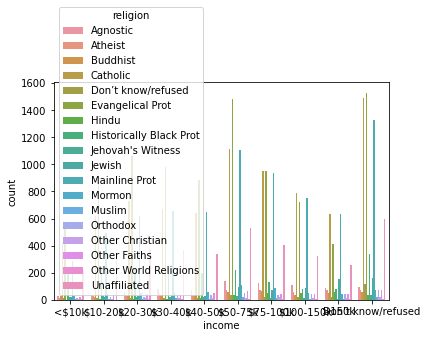

In [31]:
sns.barplot(x=df_tidy.income, y=df_tidy["count"], hue=df_tidy.religion)

### One variable stored across multiple columns

In [32]:
billboard = pd.read_csv('untidy-data/billboard.csv', encoding='unicode-escape')

In [33]:
billboard

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,8/5/00,8/5/00,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2/12/00,2/12/00,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,9/2/00,9/2/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,7/1/00,7/1/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What is the all time average of rating for each genre?

In [43]:
billboard.groupby('genre').mean().drop(columns='year').mean(axis=1)

genre
Country        36.192718
Electronica    63.441667
Gospel         67.750000
Jazz           51.800000
Latin          42.058817
Pop            50.648262
R&B            70.503141
Rap            36.413538
Reggae         72.400000
Rock           32.230337
dtype: float64

In [37]:
billboard.columns = billboard.columns[:7].tolist() + list(range(1, 77))

In [38]:
billboard

,year,artist,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,8/5/00,8/5/00,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2/12/00,2/12/00,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,9/2/00,9/2/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,7/1/00,7/1/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
billboard_melt = billboard.melt(id_vars=billboard.columns[:7],
              var_name='week',
              value_name='rating')

In [45]:
billboard_melt.head()

,year,artist,track,time,genre,date.entered,date.peaked,week,rating
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,1,71.0
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,1,57.0


In [46]:
billboard_melt.groupby('genre').rating.mean()

genre
Country        61.687500
Electronica    62.847222
Gospel         67.750000
Jazz           51.800000
Latin          47.653179
Pop            54.963504
R&B            67.632184
Rap            56.236559
Reggae         72.400000
Rock           42.206803
Name: rating, dtype: float64

In [48]:
billboard_melt.shape

(24092, 9)

### Variables are stored in both rows and columns

In [49]:
weather = pd.read_csv('untidy-data/weather.csv')

weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
weather.shape

(22, 35)

In [52]:
weather_long = weather.melt(id_vars=['id', 'year', 'month', 'element'],
            var_name='day',
            value_name='temp')
weather_long

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [57]:
weather_long.day = weather_long.day.str[1:].astype(int)
weather_long

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,1,NaN
1,MX17004,2010,1,tmin,1,NaN
2,MX17004,2010,2,tmax,1,NaN
3,MX17004,2010,2,tmin,1,NaN
4,MX17004,2010,3,tmax,1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,31,NaN
678,MX17004,2010,11,tmax,31,NaN
679,MX17004,2010,11,tmin,31,NaN
680,MX17004,2010,12,tmax,31,NaN


In [59]:
weather_long.pivot_table(index=['id', 'year', 'month', 'day'],
                        columns='element',
                        values='temp').reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
1,MX17004,2010,2,2,27.3,14.4
2,MX17004,2010,2,3,24.1,14.4
3,MX17004,2010,2,11,29.7,13.4
4,MX17004,2010,2,23,29.9,10.7
5,MX17004,2010,3,5,32.1,14.2
6,MX17004,2010,3,10,34.5,16.8
7,MX17004,2010,3,16,31.1,17.6
8,MX17004,2010,4,27,36.3,16.7
9,MX17004,2010,5,27,33.2,18.2


### More Complexity

In [60]:
sales = pd.read_csv('untidy-data/sales.csv')
sales

,Product,2016 Sales,2016 PPU,2017 Sales,2017 PPU,2018 Sales,2018 PPU
0,A,673,5,231,7,173,9
1,B,259,3,748,5,186,8
2,C,644,3,863,5,632,5
3,D,508,9,356,11,347,14


In [63]:
sales_melt = sales.melt(id_vars='Product')
sales_melt.head(10)

,Product,variable,value
0,A,2016 Sales,673
1,B,2016 Sales,259
2,C,2016 Sales,644
3,D,2016 Sales,508
4,A,2016 PPU,5
5,B,2016 PPU,3
6,C,2016 PPU,3
7,D,2016 PPU,9
8,A,2017 Sales,231
9,B,2017 Sales,748


In [68]:
sales_melt[['year', 'measure']] = sales_melt.variable.str.split(' ', expand=True)
sales_melt

,Product,variable,value,year,measure
0,A,2016 Sales,673,2016,Sales
1,B,2016 Sales,259,2016,Sales
2,C,2016 Sales,644,2016,Sales
3,D,2016 Sales,508,2016,Sales
4,A,2016 PPU,5,2016,PPU
5,B,2016 PPU,3,2016,PPU
6,C,2016 PPU,3,2016,PPU
7,D,2016 PPU,9,2016,PPU
8,A,2017 Sales,231,2017,Sales
9,B,2017 Sales,748,2017,Sales


In [74]:
sales_tidy = sales_melt.pivot_table(index=['Product', 'year'],
                      columns='measure',
                      values='value',
                      aggfunc='mean').reset_index()
sales_tidy

measure,Product,year,PPU,Sales
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632
9,D,2016,9,508


In [75]:
sales_tidy.rename_axis(None, axis=1)

,Product,year,PPU,Sales
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632
9,D,2016,9,508
